# El algoritmo k-means aplicado a clasificación y procesamiento de imágenes

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

Implementar el método k-means de forma que clasifique datos con dos dimensiones. Utilizarlo para clasificar en tres grupos los datos generados a continuación.

In [38]:
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(n_clusters=3)

In [39]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

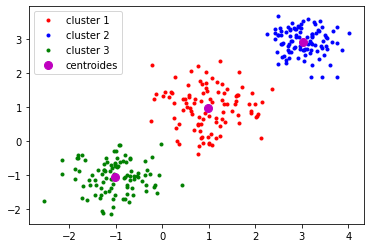

In [40]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

#### Clasificación de dígitos con k-means

Vamos a clasificar dígitos de la base de datos contenida en la librería sklearn de python utilizando el algoritmo k-means.

In [32]:
from PIL import Image
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
data = digits.data
print(data.shape)

(1797, 64)


In [4]:
data = 255-data
np.random.seed(1)
n = 10
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(data)
Z = kmeans.predict(data)

cluster 0
182 elementos


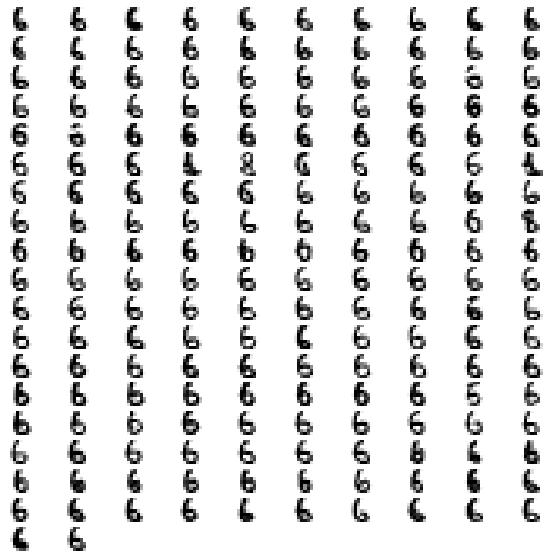

cluster 1
156 elementos


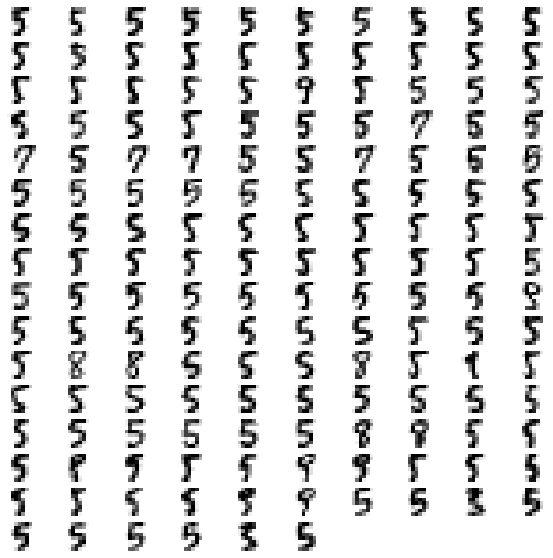

cluster 2
197 elementos


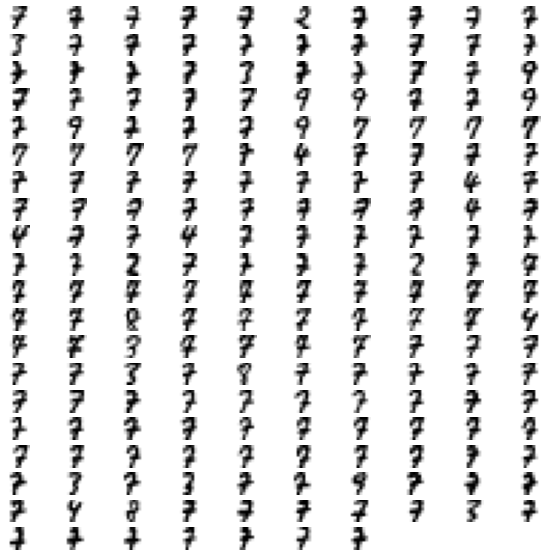

cluster 3
179 elementos


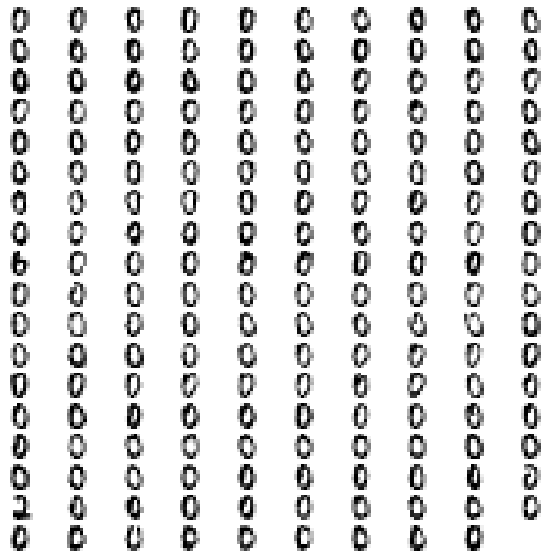

cluster 4
180 elementos


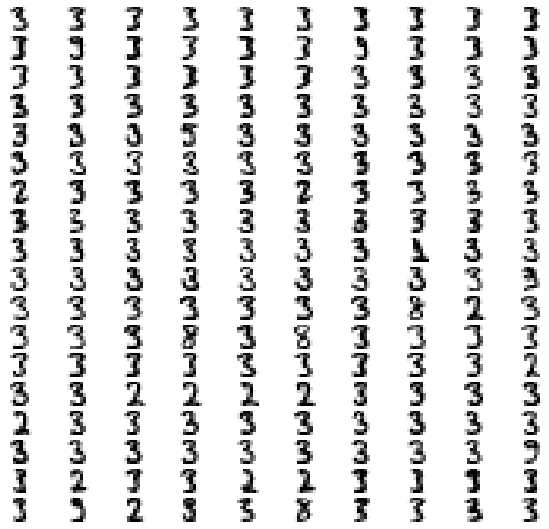

cluster 5
176 elementos


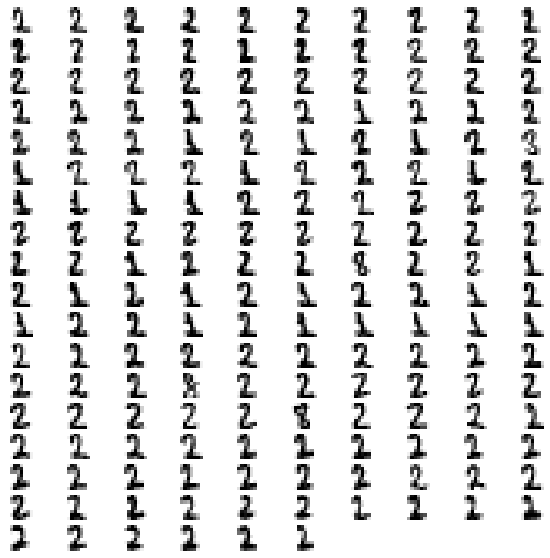

cluster 6
166 elementos


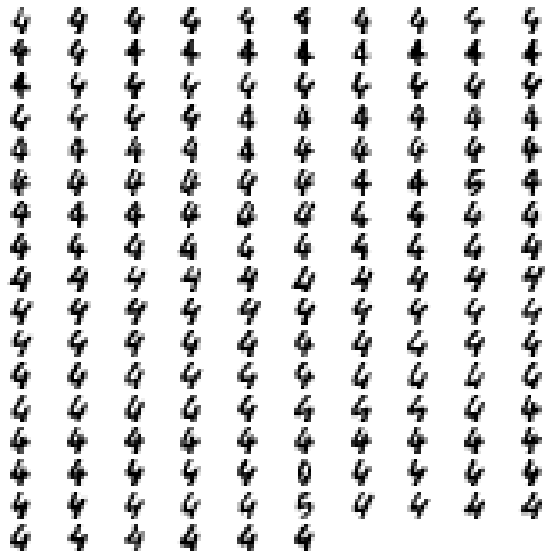

cluster 7
242 elementos


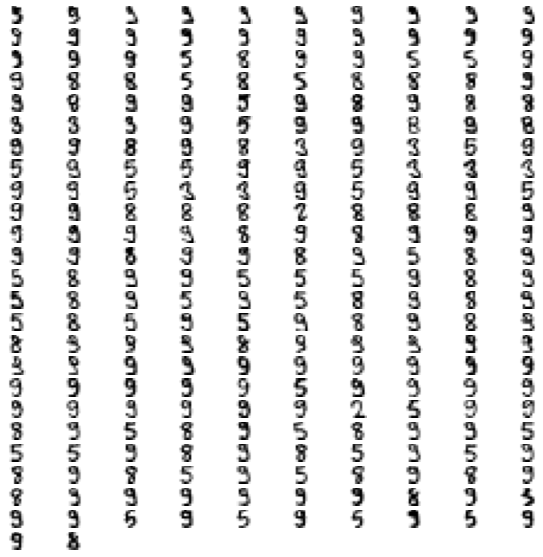

cluster 8
93 elementos


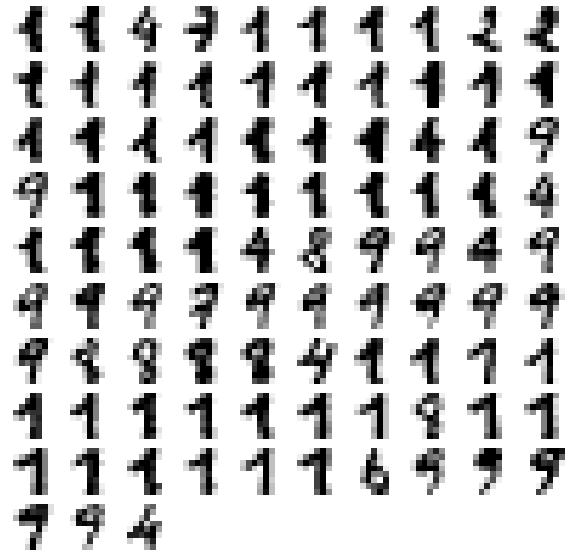

cluster 9
226 elementos


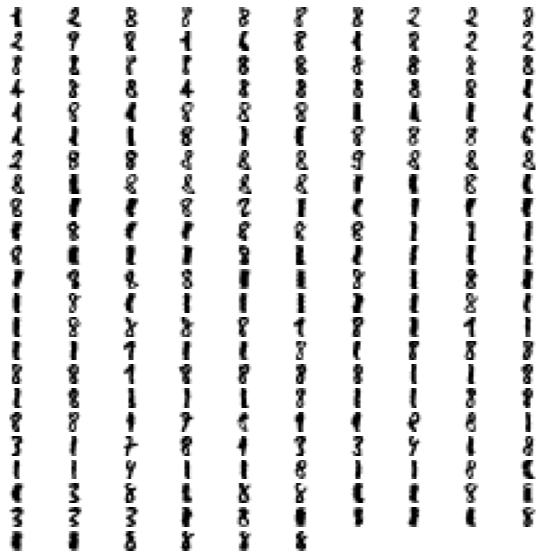

In [10]:
for i in range(0,n):

    fila = np.where(Z==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # numero imagenes de cada cluster
    r = int(np.floor(num/10.))    # numero de filas menos 1 en figura de salida 

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        imagen = data[fila[k], ]
        imagen = imagen.reshape(8, 8)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')

    plt.show()

#### Cuantificación de imágenes con k-means

Cuantificación es una técnica de compresión con pérdida que consiste en agrupar todo un rango de valores en uno solo. Si cuantificamos el color de una imagen, reducimos el número de colores necesarios para representarla y el tamaño del fichero de la misma disminuye. Esto es importante, por ejemplo, para representar una imagen en dispositivos que sólo dan soporte a un número limitado de colores.

Vamos a cuantificar el color de la imagen siguiente utilizando k-means.

In [11]:
I = Image.open("./tienda.jpg")

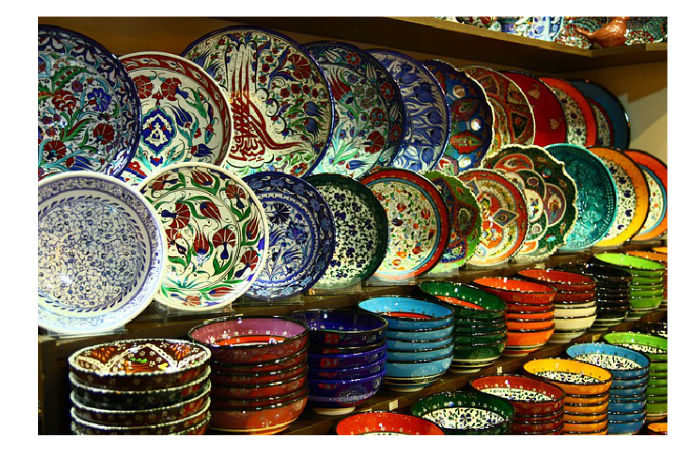

In [14]:
I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In [15]:
w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors)
num_pixels = w * h

print(u'Número de pixels  =', num_pixels)
print(u'Número de colores =', num_colores)

Número de pixels  = 342240
Número de colores = 172389


In [16]:
R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]

In [17]:
XR = R.reshape((-1, 1))
XG = G.reshape((-1, 1))
XB = B.reshape((-1, 1))
X = np.concatenate((XR, XB, XG), axis=1)

In [18]:
n = 60
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(n_clusters=60)

In [19]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [20]:
m = XR.shape
for i in range(m[0]):
    XR[i] = centroides[etiquetas[i]][0]
    XG[i] = centroides[etiquetas[i]][1]
    XB[i] = centroides[etiquetas[i]][2]
XR.shape = R.shape
XG.shape = G.shape
XB.shape = B.shape
XR = XR[:,:, np.newaxis]
XG = XG[:,:, np.newaxis]
XB = XB[:,:, np.newaxis]

Y = np.concatenate((XR, XB, XG), axis=2)

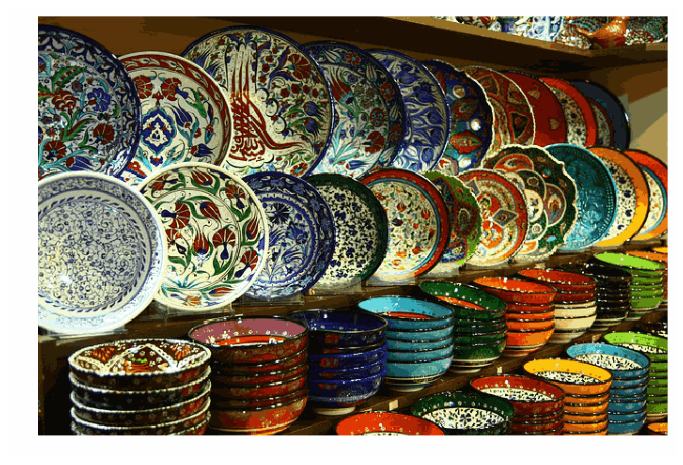

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()

In [22]:
print(u'Número de pixels  =', num_pixels)
print(u'Número de colores =', n)

Número de pixels  = 342240
Número de colores = 60


In [24]:
Y1 = np.floor(Y*255)
Image.fromarray(Y1.astype(np.uint8)).save('./tienda_comprimida.jpg')

#### Segmentación de imágenes con k-means

La segmentación divide una imagen en regiones con propiedades internas coherentes. Se puede segmentar una imagen utilizando el color.

El proceso es similar al de cuantización de imágenes. La diferencia es el objetivo con el que se agrupan los píxeles: agrupamos los píxeles para separar los elementos significativos de una imagen y así poder extraer cierta información de alguno de ellos. Por ejemplo, calcular el tamaño de un tumor a partir de imágenes médicas, el porcentaje de mica en una roca granítica, el área de un lago a partir de una foto aérea.

Comencemos con este último ejemplo. Si tenemos la siguiente imagen tomada desde un satélite del lago Victoria y el área que cubre es aproximadamente 210000 km 2 , podemos calcular, a partir del porcentaje del área de la imagen, el área del lago.

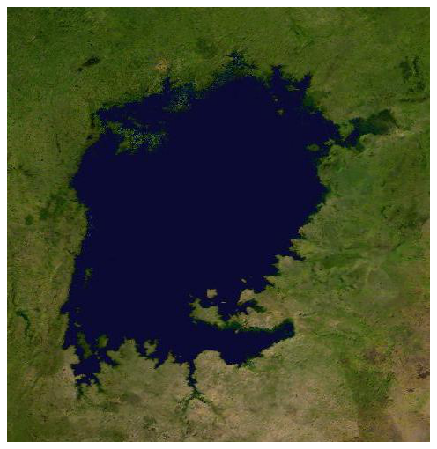

In [53]:
I = Image.open("./Lago_Victoria.jpg")

plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

Para simplificar el problema, convertimos la imagen de color a blanco y negro

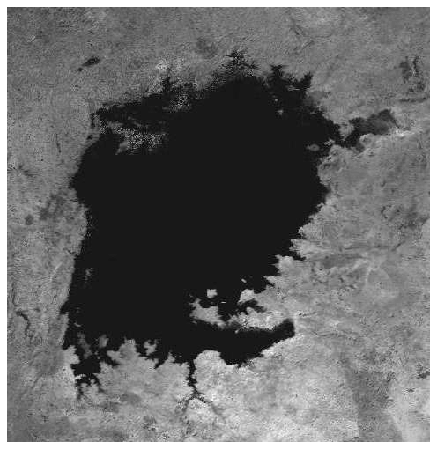

In [54]:
I1 = I.convert('L')
I2 = np.asarray(I1,dtype=float)

plt.figure(figsize=(8,8))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()

Preparamos la matriz para aplicar k-means. Ahora tendrá tantas filas como píxeles pero sólo una columna, la intensidad de gris.

In [55]:
X = I2.reshape((-1,1))

Agrupamos los píxeles en tres clusteres con k-means

In [56]:
k_means = KMeans(n_clusters=3)
k_means.fit(X) 

KMeans(n_clusters=3)

Extraemos el valor de los centroides y las etiquetas de cada pixel

In [57]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

Reconstruimos la imagen utilizando las tres intensidades de los centroides

In [58]:
I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape

Visualizamos la foto reconstruida

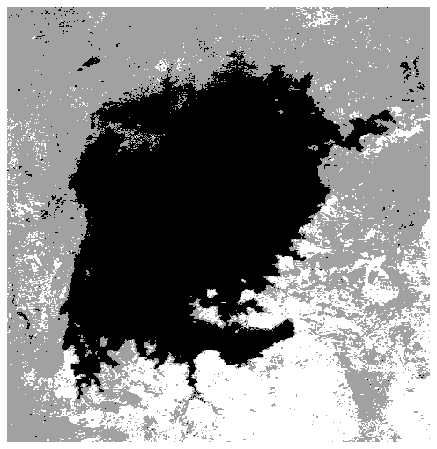

In [59]:
plt.figure(figsize=(8,8))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()

Contamos el número de píxeles de color negro (los de intensidad de gris más baja)

In [60]:
I2 = (I2_compressed-np.min(I2_compressed))/(np.max(I2_compressed)-np.min(I2_compressed))*255
I2 = Image.fromarray(I2.astype(np.uint8))
w, h =I2.size
colors = I2.getcolors(w * h)
print (colors)

[(61463, 0), (84882, 161), (37660, 255)]


Hay 61463 píxeles con intensidad 18. Calculamos el porcentaje respecto al número total de píxeles de la foto y tenemos el porcentaje del área del lago respecto al área total representada por la foto

In [61]:
print (u'Área = ',  float(210000)*float(colors[0][0])/float(w*h), 'km2')

Área =  70146.08298687535 km2
